<h1>Support Vector Machines</h1>
Here we will predict whether a given sample is benign or malignant using SVMs by analysing the cell sample features

In [78]:
import pandas as pd
import numpy as np

Now we will read the dataset.
The dataset is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

<br>
The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).
<br>

In [79]:
df = pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Now, lets have a look at the distribution of benign and malignant samples based on their clump thickness and uniformity of cell size

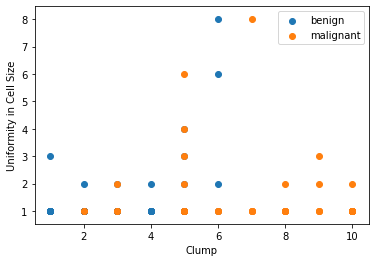

In [80]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(x = df[df['Class'] == 2][0:50]['Clump'], y = df[df['Class'] == 2][0:50]['UnifSize'], label = 'benign')
plt.scatter(x = df[df['Class'] == 4][0:50]['Clump'], y = df[df['Class'] == 2][0:50]['UnifSize'], label = 'malignant')
plt.xlabel('Clump')
plt.ylabel('Uniformity in Cell Size')
plt.legend()
plt.show()

In [81]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

As BareNuc is an object we need to first convert it into an integer so that the model can work on it.

In [82]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int64')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

<h2>Set the features and targets</h2>

In [83]:
features = ['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']
X = np.asanyarray(df[features])
X

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [84]:
y = np.asanyarray(df['Class'])
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

Lets split the dataset into training and testing sets.

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=5)

Here, we define the SVM model and then fit the training data to the model. The model uses the RBF kernel. The various kernels we can use are:

1. RBF
2. poly
3. linear
4. sigmoid
5. precomputed


In [143]:
from sklearn import svm
model = svm.SVC(C=1,kernel='rbf', gamma='scale')
model.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<h2>Prediction of testing data and Accuracy</h2>

In [146]:
ypred = model.predict(X_test)
from sklearn import metrics
print('f1 score: ', metrics.f1_score(y_test, ypred, average='weighted'))

f1 score:  0.9609756097560975


In [147]:
print(metrics.classification_report(y_test, ypred))

precision    recall  f1-score   support

           2       0.97      0.97      0.97       133
           4       0.94      0.94      0.94        72

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

